In [30]:
# Common
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Modeling
from sklearn.ensemble import RandomForestClassifier

# Model Evalution
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score
from sklearn.metrics import plot_roc_curve

In [31]:
# Import data
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
df["Cabin"].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
F33            3
              ..
A19            1
D21            1
D15            1
A5             1
B73            1
Name: Cabin, Length: 147, dtype: int64

In [35]:
len(df)

891

In [36]:
df["Cabin"] = df["Cabin"].astype("category").cat.codes
df["Sex"] = df["Sex"].astype("category").cat.codes
df["Embarked"] = df["Sex"].astype("category").cat.codes
df["Age"] = df["Age"].fillna(np.mean(df['Age']))
df.drop("Name", axis=1, inplace=True)
df.drop("Ticket", axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,-1,1
1,2,1,1,0,38.000000,1,0,71.2833,81,0
2,3,1,3,0,26.000000,0,0,7.9250,-1,0
3,4,1,1,0,35.000000,1,0,53.1000,55,0
4,5,0,3,1,35.000000,0,0,8.0500,-1,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,-1,1
887,888,1,1,0,19.000000,0,0,30.0000,30,0
888,889,0,3,0,29.699118,1,2,23.4500,-1,0
889,890,1,1,1,26.000000,0,0,30.0000,60,1


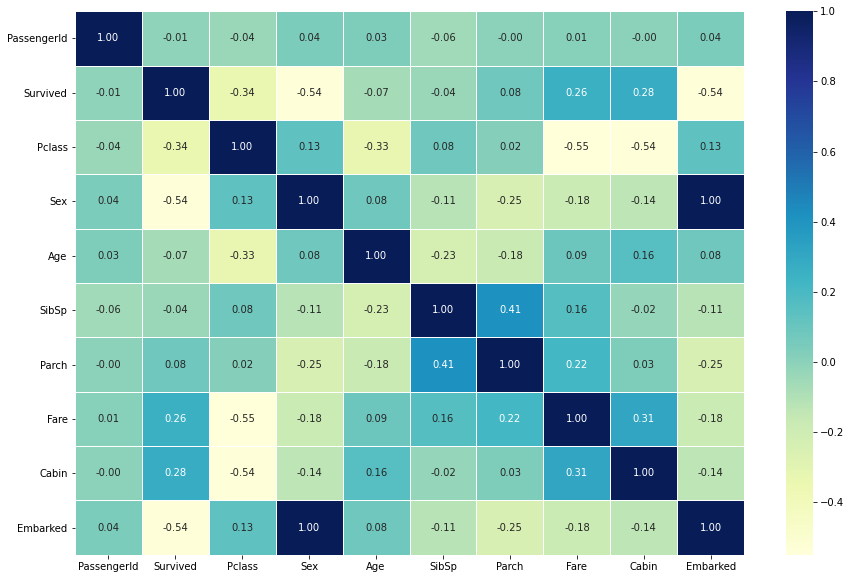

In [37]:
corelation_metrics = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corelation_metrics,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap = "YlGnBu"
                )

In [39]:
# Split data
X = df.drop("Survived", axis = 1)
y = df["Survived"]

# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modeling
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Check score
clf.score(X_test, y_test)

0.8435754189944135

In [10]:
# Changing hyperparamters
grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

np.random.seed(42)

# Setup random hyperparameters search for LogisticRegeression.
clf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=grid, cv=5, n_iter=20, verbose=True)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [11]:
clf.score(X_test, y_test)

0.8379888268156425

In [12]:
clf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [14]:
grid = {
    "n_estimators": [650, 750],
    "max_depth": [5],
    "min_samples_split": [17, 18, 19],
    "min_samples_leaf": [2, 3]
}

clf = GridSearchCV(RandomForestClassifier(), param_grid=grid, cv=5, verbose=5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=5, min_samples_leaf=2, min_samples_split=17, n_estimators=650;, score=0.811 total time=   1.5s
[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=17, n_estimators=650;, score=0.825 total time=   1.5s
[CV 3/5] END max_depth=5, min_samples_leaf=2, min_samples_split=17, n_estimators=650;, score=0.754 total time=   1.5s
[CV 4/5] END max_depth=5, min_samples_leaf=2, min_samples_split=17, n_estimators=650;, score=0.817 total time=   1.5s
[CV 5/5] END max_depth=5, min_samples_leaf=2, min_samples_split=17, n_estimators=650;, score=0.789 total time=   1.5s
[CV 1/5] END max_depth=5, min_samples_leaf=2, min_samples_split=17, n_estimators=750;, score=0.811 total time=   1.7s
[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=17, n_estimators=750;, score=0.825 total time=   1.7s
[CV 3/5] END max_depth=5, min_samples_leaf=2, min_samples_split=17, n_estimators=750;, score=0.754 total time=   

0.8324022346368715

In [40]:
test_df = pd.read_csv("test.csv")

In [41]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
test_df["Cabin"] = df["Cabin"].astype("category").cat.codes
test_df["Sex"] = df["Sex"].astype("category").cat.codes
test_df["Embarked"] = df["Sex"].astype("category").cat.codes
test_df["Age"] = df["Age"].fillna(np.mean(df['Age']))
test_df.drop("Name", axis=1, inplace=True)
test_df.drop("Ticket", axis=1, inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,22.0,0,0,7.8292,0,1
1,893,3,0,38.0,1,0,7.0000,82,0
2,894,2,0,26.0,0,0,9.6875,0,0
3,895,3,0,35.0,0,0,8.6625,56,0
4,896,3,1,35.0,1,1,12.2875,0,1


In [43]:
test_df["Fare"] = test_df["Fare"].fillna(np.mean(test_df["Fare"]))
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,22.000000,0,0,7.8292,0,1
1,893,3,0,38.000000,1,0,7.0000,82,0
2,894,2,0,26.000000,0,0,9.6875,0,0
3,895,3,0,35.000000,0,0,8.6625,56,0
4,896,3,1,35.000000,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,29.699118,0,0,8.0500,0,1
414,1306,1,1,44.000000,0,0,108.9000,0,1
415,1307,3,0,29.699118,0,0,7.2500,0,0
416,1308,3,0,34.000000,0,0,8.0500,0,0


In [44]:
clf.predict(test_df)

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [45]:
test_df["Survived"] = clf.predict(test_df)

In [50]:
test_df.drop(["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"], axis=1, inplace=True)

In [52]:
test_df.to_csv("test-result.csv", index=False)

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

c:\users\shashang\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7988826815642458